# Data Advanced Analytics

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
db = pd.read_csv('/content/drive/MyDrive/teste ifood/ml_project1_data.csv', sep=',')

## EDA

Exploring dataset, checking outliers, NaN values, null values, etc.

In [4]:
db.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
#Nan Values
db

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [6]:
#Null values
db.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
db['Income'].mode()

0    7500.0
dtype: float64

In [8]:
#Replacing null values by mode income 7500 found above
db['Income'] = db['Income'].fillna(db['Income'].mean())

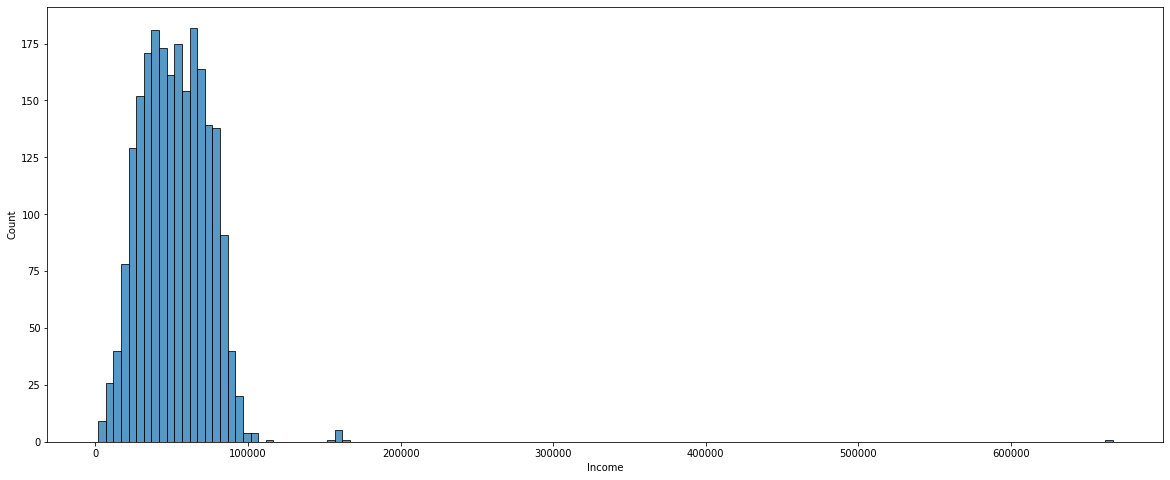

In [9]:
#income outliers

plt.figure(figsize=[20, 8])
sns.histplot(db, x='Income')

In [10]:
outliers = db[db['Income'] > 115000]
outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


In [11]:
#Removing income outlier

db = db.drop(db[db['Income'] >= 115000].index)

In [12]:
#checking
db[db['Income'] >= 115000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [13]:
#checking
plt.figure(figsize=[20, 8])
px.histogram(db, x='Income')

<Figure size 1440x576 with 0 Axes>

In [14]:
#Creating Age for checking age outliers
db['Age'] = 2021 - db['Year_Birth']

In [15]:
#Age outliers

plt.figure(figsize=[25, 8])
px.histogram(db, x='Age')

<Figure size 1800x576 with 0 Axes>

In [16]:
db[db['Age'] >= 81]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,121
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,128
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,122
1950,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,0,7,0,0,6,1,3,1,4,5,0,0,0,0,0,0,3,11,0,81


In [17]:
#Deleting outliers age > 81

db = db.drop(db[db['Age'] >= 81].index)

In [18]:
#Checking

plt.figure(figsize=[25, 8])
px.histogram(db, x='Age')

<Figure size 1800x576 with 0 Axes>

## Feature Engineering

Creating features that will be needed for analysis

In [19]:
#making slice to create month and year columns for analysis
db['Dt_day'] = db['Dt_Customer'].apply(lambda data: data.split('-')[2]) 
db['Dt_month'] = db['Dt_Customer'].apply(lambda data: data.split('-')[1])
db['Dt_year'] = db['Dt_Customer'].apply(lambda data: data.split('-')[0])

#Creating year-month atribute for forecast
db['Dt_ym'] = db['Dt_year']+'-'+db['Dt_month'] + '-' + '1'

In [20]:
#Creating total dependents columns
db['Dependents'] = db['Kidhome'] + db['Teenhome']

In [21]:
#Creating total of campaigns
db['CmpTT'] = db['AcceptedCmp1']+db['AcceptedCmp2']+db['AcceptedCmp3']+	db['AcceptedCmp4']+db['AcceptedCmp5']

In [22]:
#Creating total consumption
db['MntTT'] =  db['MntWines'] + db['MntFruits'] + db['MntMeatProducts'] + db['MntFishProducts'] + db['MntSweetProducts'] + db['MntGoldProds']

## Analysis

The analyzes were separated into the following groups:

### Social Analysis:

Social analysis containing a democratic overview and comparisons with schooling, marital status and income

In [23]:
plt.figure(figsize=[20, 8])
px.histogram(db, x='Education', title='Total customers by graduation')

<Figure size 1440x576 with 0 Axes>

In [24]:
plt.figure(figsize=[15, 8])
px.pie(db, names='Education', title='Total customers% by graduation')

<Figure size 1080x576 with 0 Axes>

In [25]:
plt.figure(figsize=[10, 8])
px.histogram(db, x='Education', color='Marital_Status', title='Education per Marital Status')

<Figure size 720x576 with 0 Axes>

In [26]:
plt.figure(figsize=[20, 8])
px.histogram(db, x='Marital_Status', title='Marital Status')

<Figure size 1440x576 with 0 Axes>

In [27]:
plt.figure(figsize=[15, 8])
px.pie(db, names='Marital_Status', title='Marital Status%')

<Figure size 1080x576 with 0 Axes>

In [28]:
plt.figure(figsize=[15, 8])
px.histogram(db, x='Marital_Status', color='Education', title='Marital Status per Education')

<Figure size 1080x576 with 0 Axes>

In [29]:
#lol
db[db['Marital_Status'] == 'YOLO']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Dt_day,Dt_month,Dt_year,Dt_ym,Dependents,CmpTT,MntTT
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,0,48,18,10,2012,2012-10-1,1,0,424
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1,48,18,10,2012,2012-10-1,1,0,424


In [30]:
db[db['Marital_Status'] == 'Absurd']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Dt_day,Dt_month,Dt_year,Dt_ym,Dependents,CmpTT,MntTT
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,3,11,1,28,19,12,2012,2012-12-1,0,2,1216
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,3,11,0,64,10,01,2014,2014-01-1,0,0,1169


In [31]:
#:/
db[db['Marital_Status'] == 'Alone']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Dt_day,Dt_month,Dt_year,Dt_ym,Dependents,CmpTT,MntTT
131,433,1958,Master,Alone,61331.0,1,1,2013-03-10,42,534,5,47,0,5,41,5,11,1,6,8,0,0,0,0,0,0,3,11,0,63,10,03,2013,2013-03-1,2,0,632
138,7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,0,3,11,1,48,19,05,2014,2014-05-1,2,1,49
153,92,1988,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,3,11,0,33,12,05,2014,2014-05-1,1,0,89


In [32]:
rm = db.groupby('Age').mean()['Income'].sort_values(ascending=False)
rm = rm.to_frame().reset_index()
rm.columns = ['Age', 'RM']
px.bar(rm, x='Age', y='RM', title='Mean Income per Age')

In [33]:
rm = db.groupby(by=['Age', 'Education']).mean()['Income'].sort_values(ascending=False)
rm = rm.to_frame().reset_index()
rm.columns = ['Age', 'Education', 'Mean Income']

plt.figure(figsize=[15, 8])
px.bar(rm, x='Age', y='Mean Income', title='Mean Income per Education', color='Education')

<Figure size 1080x576 with 0 Axes>

In [34]:
re = db.groupby('Education').mean()['Income'].sort_values(ascending=False)
re = re.to_frame().reset_index()
re.columns = ['Education', 'Mean Income']

plt.figure(figsize=[10, 8])
px.bar(re, x='Education', y='Mean Income', title='Mean Income per Education')

#The average income does not have much variation, only the basic one (2.5% of the dataset)

<Figure size 720x576 with 0 Axes>

In [35]:
plt.figure(figsize=[20,8])
px.scatter(db, x='Income', color='Education', title='Income per Education')

<Figure size 1440x576 with 0 Axes>

In [36]:
px.pie(re, names='Education', values='Mean Income', title='Mean Income per Education%')

### Purchase Analysis

Purchase Analysis analyzing consumers' buying behavior according to their demographic characteristics

In [37]:
tts = db.groupby(by=['Age', 'Education']).sum()['MntTT']
tts = tts.to_frame().reset_index()

plt.figure(figsize=[15, 8])
px.bar(tts, x='Age', y='MntTT', title='Total Spent per Education', color='Education')

<Figure size 1080x576 with 0 Axes>

In [38]:
plt.figure(figsize=[20,8])
px.scatter(db, x='Income', y='MntTT', color='Age', title=' Total Spent per Income')

<Figure size 1440x576 with 0 Axes>

In [39]:
plt.figure(figsize=[20,8])
px.scatter(db, x='Income', y='MntWines', color='Age', title='Total Spent with Wine per Income')

<Figure size 1440x576 with 0 Axes>

In [40]:
plt.figure(figsize=[15,8])
px.scatter(db, x='Income', y='MntFruits', color='Age', title='Total Spent with Fruits per Income')

<Figure size 1080x576 with 0 Axes>

In [41]:
plt.figure(figsize=[20,8])
px.scatter(db, x='Income', y='MntMeatProducts', color='Age', title='Total Spent with Meat Products per Income')

<Figure size 1440x576 with 0 Axes>

In [42]:
plt.figure(figsize=[20,8])
px.scatter(db, x='Income', y='MntFishProducts', color='Age', title='Total Spent with Fish Products')

<Figure size 1440x576 with 0 Axes>

In [43]:
plt.figure(figsize=[20,8])
px.scatter(db, x='Income', y='MntSweetProducts', color='Age', title='Total Spent with Sweet Products per Income')

<Figure size 1440x576 with 0 Axes>

In [44]:
plt.figure(figsize=[20,8])
px.scatter(db, x='Income', y='MntGoldProds', color='Age', title='Total Spent with Gold Products per Income')

<Figure size 1440x576 with 0 Axes>

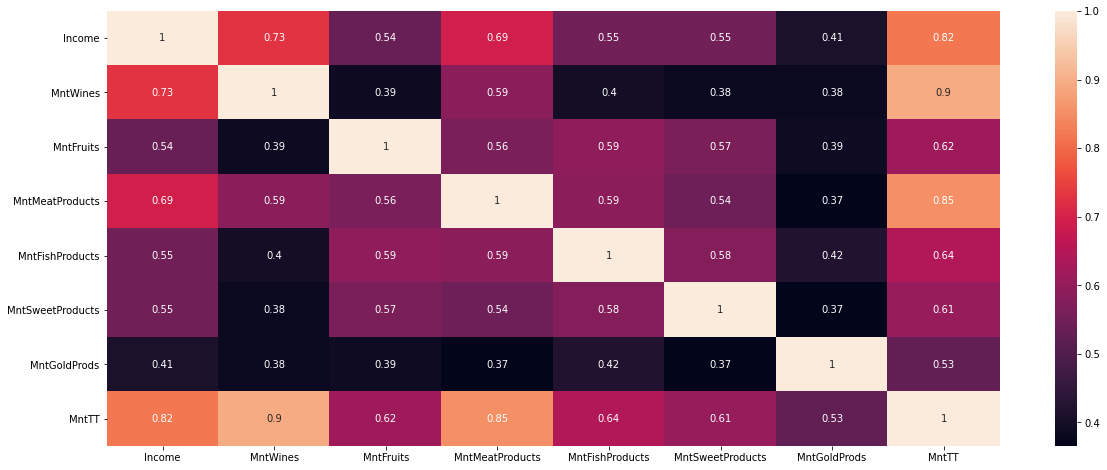

In [45]:
#Income x Total Spent pearson correlation
corr = db[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 
           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntTT']].corr(method='pearson')
           
plt.figure(figsize=[20, 8])
sns.heatmap(corr, annot=True)

#As seen above visually in the scatterplot, there is a correlation of Income x Spent, the higher the income the greater the expenditure

In [46]:
c = db.groupby('Education').sum()['MntTT']
c.columns = ['Education', 'MntTT']
plt.figure(figsize=[10, 8])
px.pie(db, names='Education', values='MntTT', color='Education', title='Total Spent% per Education')

<Figure size 720x576 with 0 Axes>

In [47]:
plt.figure(figsize=[20,8])
px.scatter(db, x='Income', y='MntTT', color='Education', title='Total Spent per Education')

<Figure size 1440x576 with 0 Axes>

In [48]:
plt.figure(figsize=[20,8])
px.scatter(db, x='Income', y='MntWines', color='Education', title='Total Spent with Wine per Education')

<Figure size 1440x576 with 0 Axes>

In [49]:
plt.figure(figsize=[20,8])
px.scatter(db, x='Income', y='MntFruits', color='Education', title='Total Spent with Fruits per Education')

<Figure size 1440x576 with 0 Axes>

In [50]:
plt.figure(figsize=[20,8])
px.scatter(db, x='Income', y='MntMeatProducts', color='Education', title='Total Spent with Meat per Education')

<Figure size 1440x576 with 0 Axes>

In [51]:
plt.figure(figsize=[20,8])
px.scatter(db, x='Income', y='MntFishProducts', color='Education', title='Total Spent with Fish per Education')

<Figure size 1440x576 with 0 Axes>

In [52]:
plt.figure(figsize=[20,8])
px.scatter(db, x='Income', y='MntSweetProducts', color='Education', title='Total Spent with Sweet Products per Education')

<Figure size 1440x576 with 0 Axes>

In [53]:
plt.figure(figsize=[20,8])
px.scatter(db, x='Income', y='MntGoldProds', color='Education', title='Total Spent with Gold Products per Education')

<Figure size 1440x576 with 0 Axes>

### Frequency

Number of times and the total purchases made were analyzed.

In [54]:
py = db.groupby('Dt_year').sum()['MntTT']
py = py.to_frame().reset_index()
py.columns = ['Dt_year', 'MntTT']
px.bar(py, x='Dt_year', y='MntTT', title='Total Spend per Year')

In [55]:
plt.figure(figsize=[20, 8])
px.pie(py, names='Dt_year', values='MntTT', title='Total Spent% per Year')

#Half of the total revenue in the 3 years was the result of 2013
#Metade da receita total nos 3 anos foi resultado de 2013

<Figure size 1440x576 with 0 Axes>

In [56]:
pid = db.groupby('Dt_Customer').nunique()['ID'].reset_index()
pid.columns = ['Dt_Customer', 'ID']
px.line(pid, x='Dt_Customer', y='ID', title='Total of Clients per date')

In [57]:
piy = db.groupby('Dt_year').nunique()['ID'].reset_index()
piy.columns = ['Dt_year', 'ID']
px.bar(piy, x='Dt_year', y='ID', title='Total of Customers per Year')

### Costumers with Dependents Analysis

Purchases were analyzed according to the number of consumers' dependents.

In [58]:
plt.figure(figsize=[20, 8])
px.pie(db, names='Dependents', values='MntTT', title='Total Spend of Customers with Dependents%')

#Almost half of all consumption is for customers with at least 1 dependent, while the other half is for customers without dependents
#Quase metade de todo o consumo é de clientes com pelo menos 1 dependente, enquanto que a outra metade é de clientes sem dependentes

<Figure size 1440x576 with 0 Axes>

In [59]:
px.pie(db, names='Kidhome', values='MntTT', title='Total Spend of Customers with Kids%')

In [60]:
px.pie(db, names='Teenhome', values='MntTT', title='Total Spend of Customers with Teens%')

### Campaigns Analysis

Analysis of purchases by number of campaigns sent

In [61]:
plt.figure(figsize=[15, 8])
px.pie(db, names='CmpTT', title='Total of Customers per Total of Campaigns Accepted')

<Figure size 1080x576 with 0 Axes>

In [62]:
plt.figure(figsize=[15, 8])
px.pie(db, names='CmpTT', values='MntTT', title='Total Spent per Number of Campaigns Accepted')

#Most consumers already buy regardless of campaigns
#A maioria dos consumidores já compram independente das campanhas

<Figure size 1080x576 with 0 Axes>

### Recency

In [63]:
rec = db.groupby('Recency').nunique()['ID'].sort_values(ascending=False)
rec = rec.to_frame().reset_index()
rec.columns = ['Recency', 'QTD']
px.bar(rec, x='Recency', y='QTD', title='Total of Customers per Recency')

In [64]:
px.histogram(db, x='Recency', y='CmpTT', color='CmpTT', title='Total of Campaigns Accepted per Recency')

##Time series forecast

In [65]:
db.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Dt_day,Dt_month,Dt_year,Dt_ym,Dependents,CmpTT,MntTT
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,04,09,2012,2012-09-1,0,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,08,03,2014,2014-03-1,2,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,21,08,2013,2013-08-1,0,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,10,02,2014,2014-02-1,1,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,19,01,2014,2014-01-1,1,0,422


In [66]:
#Creating dataset to forecast
dbf =  db.groupby('Dt_ym').sum()['MntTT']
dbf = dbf.to_frame().reset_index()
dbf.columns = ['ds', 'y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


Text(0.5, 1.0, 'Total Spend of Customers Forecast')

<Figure size 1800x1440 with 0 Axes>

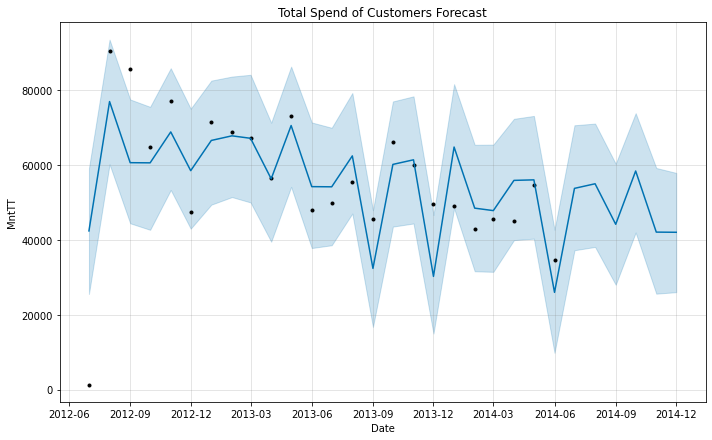

In [67]:
from fbprophet import Prophet

dbf_model = Prophet(weekly_seasonality=True) #instantiating the model
dbf_model.fit(dbf) #fitting dataset
dbf_forecast = dbf_model.make_future_dataframe(periods=6, freq='MS') #predicting next 6 months
dbf_forecast = dbf_model.predict(dbf_forecast)

#Plotting the predict
plt.figure(figsize=(25, 20))
dbf_model.plot(dbf_forecast, xlabel ='Date', ylabel ='MntTT')
plt.title('Total Spend of Customers Forecast')

In [68]:
dbf_forecast[['ds', 'yhat']].tail(6)

,ds,yhat
24,2014-07-01,53743.886428
25,2014-08-01,54973.963445
26,2014-09-01,44152.022396
27,2014-10-01,58382.874461
28,2014-11-01,42063.129053
29,2014-12-01,42018.929956


## Classification

Creating, training and valuating model to predict which customers will accept offers

In [69]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

In [71]:
dbml = db[['Education', 'Marital_Status', 'Income', 'Recency', 
          'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
          'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','MntTT', 'NumCatalogPurchases', 
          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
          'AcceptedCmp1', 'AcceptedCmp2', 'CmpTT', 'Complain', 'Z_CostContact',
          'Z_Revenue', 'Response', 'Age', 'Dependents', 'Kidhome', 'Teenhome']]

In [72]:
#Categoric count of unique values
dbml[['Education', 'Marital_Status']].nunique()

Education         5
Marital_Status    8
dtype: int64

In [73]:
dbml = pd.get_dummies(dbml)

In [74]:
dbml

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,MntTT,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,CmpTT,Complain,Z_CostContact,Z_Revenue,Response,Age,Dependents,Kidhome,Teenhome,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,58,635,88,546,172,88,88,3,8,1617,10,4,7,0,0,0,0,0,0,0,3,11,1,64,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,46344.0,38,11,1,6,2,1,6,2,1,27,1,2,5,0,0,0,0,0,0,0,3,11,0,67,2,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0
2,71613.0,26,426,49,127,111,21,42,1,8,776,2,10,4,0,0,0,0,0,0,0,3,11,0,56,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,26646.0,26,11,4,20,10,3,5,2,2,53,0,4,6,0,0,0,0,0,0,0,3,11,0,37,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,58293.0,94,173,43,118,46,27,15,5,5,422,3,6,5,0,0,0,0,0,0,0,3,11,0,40,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,1341,3,4,5,0,0,0,0,0,0,0,3,11,0,54,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2236,64014.0,56,406,0,30,0,0,8,7,8,444,2,5,7,0,0,0,1,0,1,0,3,11,0,75,3,2,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2237,56981.0,91,908,48,217,32,12,24,1,2,1241,3,13,6,0,1,0,0,0,1,0,3,11,0,40,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2238,69245.0,8,428,30,214,80,30,61,2,6,843,5,10,3,0,0,0,0,0,0,0,3,11,0,65,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [75]:
x = dbml.drop('Response', axis=1)
y = dbml['Response']

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



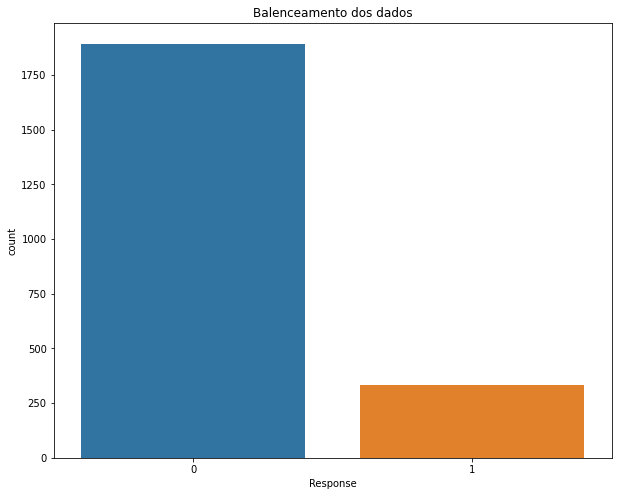

0    1894
1     334
Name: Response, dtype: int64

In [77]:
#checking target

plt.subplots(figsize=(10,8))

sns.countplot(db['Response'])
plt.title('Balenceamento dos dados')
plt.show()

#Contagem
db['Response'].value_counts()

#1 if costumer accepted the offer in the last campaing, 0 otherwise

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From versi

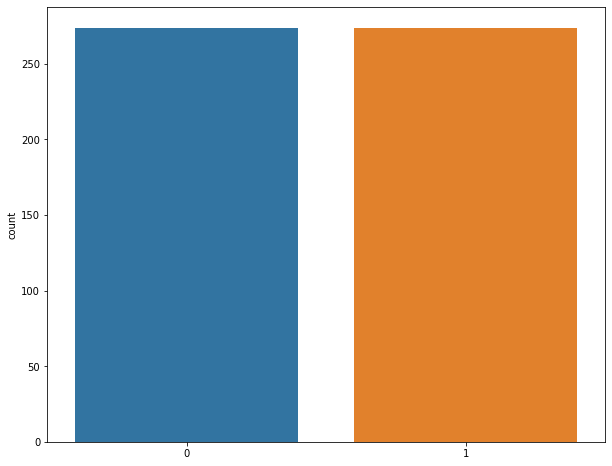

In [78]:
#balancing dataset for fitting

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

x_rus, y_rus = rus.fit_sample(x_train, y_train)

plt.figure(figsize=[10, 8])
sns.countplot(y_rus)

### Creating Baseline

In [79]:
#creating baseline
baseline_preds = np.random.choice([0,1], size = len(y_test))

print(baseline_preds)

[0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1
 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1
 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0
 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0
 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1
 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0
 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0
 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0
 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0
 0 0]


Baseline report: 
               precision    recall  f1-score   support

           0       0.84      0.49      0.62       386
           1       0.10      0.38      0.16        60

    accuracy                           0.47       446
   macro avg       0.47      0.44      0.39       446
weighted avg       0.74      0.47      0.55       446



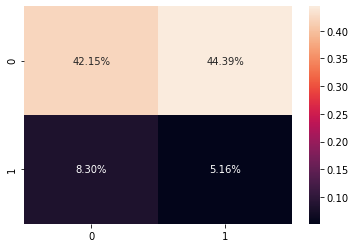

In [80]:
rep = classification_report(y_test, baseline_preds)
print(f'Baseline report: \n {rep}')

baseline_matrix = confusion_matrix(y_test, baseline_preds)
sns.heatmap(baseline_matrix/np.sum(baseline_matrix), annot=True, fmt='.2%')

### Training Models

In [81]:
rfc = RandomForestClassifier(random_state=1)
lr = LogisticRegression(random_state=1)
xgbc = XGBClassifier(random_state=1)

# Random Forest creates decision trees at random, where each tree will be used in the choice of the final result.
# Logistic Regression aims to produce, from a set of observations, a model that allows the prediction (probability) of values ​​taken by a categorical variable.
# XGBoost It is an algorithm based on Decision Trees (Gradient Boosting). means that the algorithm uses 
#the Gradient Descent algorithm to minimize the loss (loss) while new models are being added.

In [82]:
rfc.fit(x_rus, y_rus)
lr.fit(x_rus, y_rus)
xgbc.fit(x_train.values, y_train.values) #XGBoost has parameters that deal with data imbalance

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [83]:
rfc_pred = rfc.predict(x_test) #Random Forest Classifier
lr_pred = lr.predict(x_test) #Logistic Regression
xgbc_pred = xgbc.predict(x_test.values) #XGBoost Classifier

Random Forest Classifier report: 
               precision    recall  f1-score   support

           0       0.95      0.81      0.88       386
           1       0.38      0.73      0.50        60

    accuracy                           0.80       446
   macro avg       0.66      0.77      0.69       446
weighted avg       0.87      0.80      0.82       446



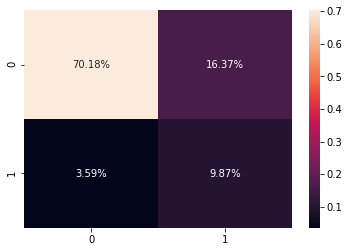

In [84]:
rep = classification_report(y_test, rfc_pred)
print(f'Random Forest Classifier report: \n {rep}')

rfc_matrix = confusion_matrix(y_test, rfc_pred)
sns.heatmap(rfc_matrix/np.sum(rfc_matrix), annot=True, fmt='.2%')

Logistic Regression report: 
               precision    recall  f1-score   support

           0       0.92      0.72      0.81       386
           1       0.26      0.62      0.36        60

    accuracy                           0.71       446
   macro avg       0.59      0.67      0.59       446
weighted avg       0.83      0.71      0.75       446



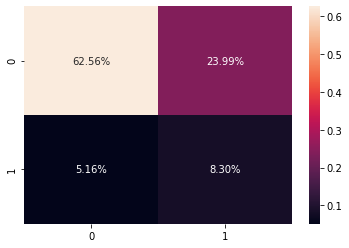

In [85]:
rep = classification_report(y_test, lr_pred)
print(f'Logistic Regression report: \n {rep}')

lr_matrix = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_matrix/np.sum(lr_matrix), annot=True, fmt='.2%')

XGBoost Classifier report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       386
           1       0.63      0.37      0.46        60

    accuracy                           0.89       446
   macro avg       0.77      0.67      0.70       446
weighted avg       0.87      0.89      0.87       446



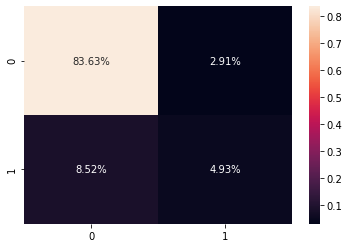

In [86]:
rep = classification_report(y_test, xgbc_pred)
print(f'XGBoost Classifier report: \n {rep}')

xgbc_matrix = confusion_matrix(y_test, xgbc_pred)
sns.heatmap(xgbc_matrix/np.sum(xgbc_matrix), annot=True, fmt='.2%')

## Comparing Models

In [87]:
print('Random Forest Recall: ', recall_score(y_test, rfc_pred))
print('Logistic Regression Recall: ', recall_score(y_test, lr_pred))
print('Baseline Recall: ', recall_score(y_test, baseline_preds))
print('XGBoost Classifier Recall: ', recall_score(y_test, xgbc_pred))

print('\n')

print('XGBoost Classifier Precision: ', precision_score(y_test, xgbc_pred))
print('Random Forest Precision: ', precision_score(y_test, rfc_pred))
print('Logistic Regression Precision: ', precision_score(y_test, lr_pred))
print('Baseline Precision: ', precision_score(y_test, baseline_preds))

print('\n')

print('XGBoost Classifier Accuracy: ', accuracy_score(y_test, xgbc_pred))
print('Random Forest Accuracy: ', accuracy_score(y_test, rfc_pred))
print('Logistic Regression Accuracy: ', accuracy_score(y_test, lr_pred))
print('Baseline Accuracy: ', accuracy_score(y_test, baseline_preds))

Random Forest Recall:  0.7333333333333333
Logistic Regression Recall:  0.6166666666666667
Baseline Recall:  0.38333333333333336
XGBoost Classifier Recall:  0.36666666666666664


XGBoost Classifier Precision:  0.6285714285714286
Random Forest Precision:  0.37606837606837606
Logistic Regression Precision:  0.2569444444444444
Baseline Precision:  0.10407239819004525


XGBoost Classifier Accuracy:  0.8856502242152466
Random Forest Accuracy:  0.8004484304932735
Logistic Regression Accuracy:  0.7085201793721974
Baseline Accuracy:  0.4730941704035874
